In [1]:
# 1a

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()   # iris.target_names
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        print(f"Correct prediction: {x_test[i]} is class {y_pred[i]}")
    else:
        print(f"Wrong prediction: {x_test[i]} is classified as {y_pred[i]}, expected {y_test[i]}")

Correct prediction: [6.1 2.8 4.7 1.2] is class 1
Correct prediction: [5.7 3.8 1.7 0.3] is class 0
Correct prediction: [7.7 2.6 6.9 2.3] is class 2
Correct prediction: [6.  2.9 4.5 1.5] is class 1
Correct prediction: [6.8 2.8 4.8 1.4] is class 1
Correct prediction: [5.4 3.4 1.5 0.4] is class 0
Correct prediction: [5.6 2.9 3.6 1.3] is class 1
Correct prediction: [6.9 3.1 5.1 2.3] is class 2
Correct prediction: [6.2 2.2 4.5 1.5] is class 1
Correct prediction: [5.8 2.7 3.9 1.2] is class 1
Correct prediction: [6.5 3.2 5.1 2. ] is class 2
Correct prediction: [4.8 3.  1.4 0.1] is class 0
Correct prediction: [5.5 3.5 1.3 0.2] is class 0
Correct prediction: [4.9 3.1 1.5 0.1] is class 0
Correct prediction: [5.1 3.8 1.5 0.3] is class 0
Correct prediction: [6.3 3.3 4.7 1.6] is class 1
Correct prediction: [6.5 3.  5.8 2.2] is class 2
Correct prediction: [5.6 2.5 3.9 1.1] is class 1
Correct prediction: [5.7 2.8 4.5 1.3] is class 1
Correct prediction: [6.4 2.8 5.6 2.2] is class 2
Correct prediction: 

In [2]:
# 1b 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier

data=pd.read_csv('iris.csv')
x=np.array(data.iloc[:,:-1])
y=np.array(data.iloc[:,-1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

for i in range(0,len(x_test)):
    if y_test[i]==y_pred[i]:
        print(y_test[i]," is correctly predicted as: ",y_pred[i])
    else:
        print(y_test[i]," is wrongly predicted as: ",y_pred[i])
        
print("\n")
print("accuracy= ",metrics.accuracy_score(y_test,y_pred))
print("confusion matrix:\n",metrics.confusion_matrix(y_pred,y_test))

Versicolor  is correctly predicted as:  Versicolor
Setosa  is correctly predicted as:  Setosa
Virginica  is correctly predicted as:  Virginica
Versicolor  is correctly predicted as:  Versicolor
Versicolor  is correctly predicted as:  Versicolor
Setosa  is correctly predicted as:  Setosa
Versicolor  is correctly predicted as:  Versicolor
Virginica  is correctly predicted as:  Virginica
Versicolor  is correctly predicted as:  Versicolor
Versicolor  is correctly predicted as:  Versicolor
Virginica  is correctly predicted as:  Virginica
Setosa  is correctly predicted as:  Setosa
Setosa  is correctly predicted as:  Setosa
Setosa  is correctly predicted as:  Setosa
Setosa  is correctly predicted as:  Setosa
Versicolor  is correctly predicted as:  Versicolor
Virginica  is correctly predicted as:  Virginica
Versicolor  is correctly predicted as:  Versicolor
Versicolor  is correctly predicted as:  Versicolor
Virginica  is correctly predicted as:  Virginica
Setosa  is correctly predicted as:  Se

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


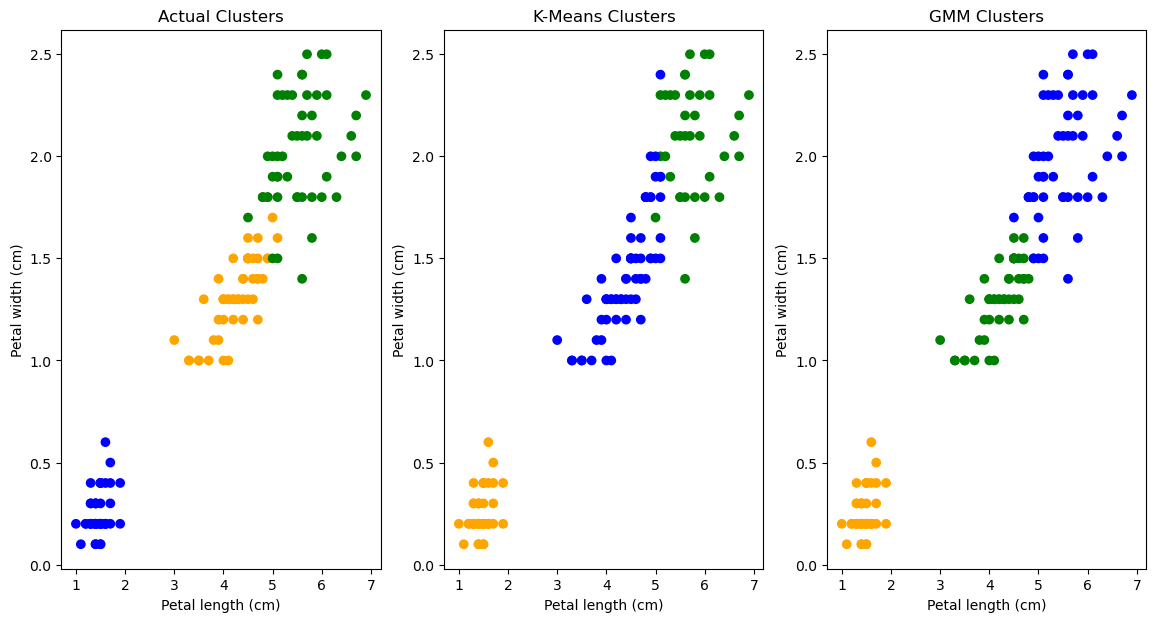

In [3]:
# 2a 

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

kmeans = KMeans(n_clusters = len(iris.target_names), random_state = 42)
kmeans.fit(iris.data)

gm = GaussianMixture(n_components = len(iris.target_names), random_state = 42)
gm.fit(iris.data)
gm_predictions = gm.predict(iris.data)

colormap = np.array(['blue', 'orange', 'green'])
plt.figure(figsize=(14,7))

# actual cluster
plt.subplot(1, 3, 1)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[iris.target])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Actual Clusters")

# the clusters predicted by K-Means
plt.subplot(1, 3, 2)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[kmeans.labels_])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("K-Means Clusters")

# the clusters predicted by Gaussian Mixture (GM)
plt.subplot(1, 3, 3)
plt.scatter(iris.data[:,2], iris.data[:,3], c = colormap[gm_predictions])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("GMM Clusters")
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy of K-Means: 0.24
Accuracy of EM (GMM): 0.0


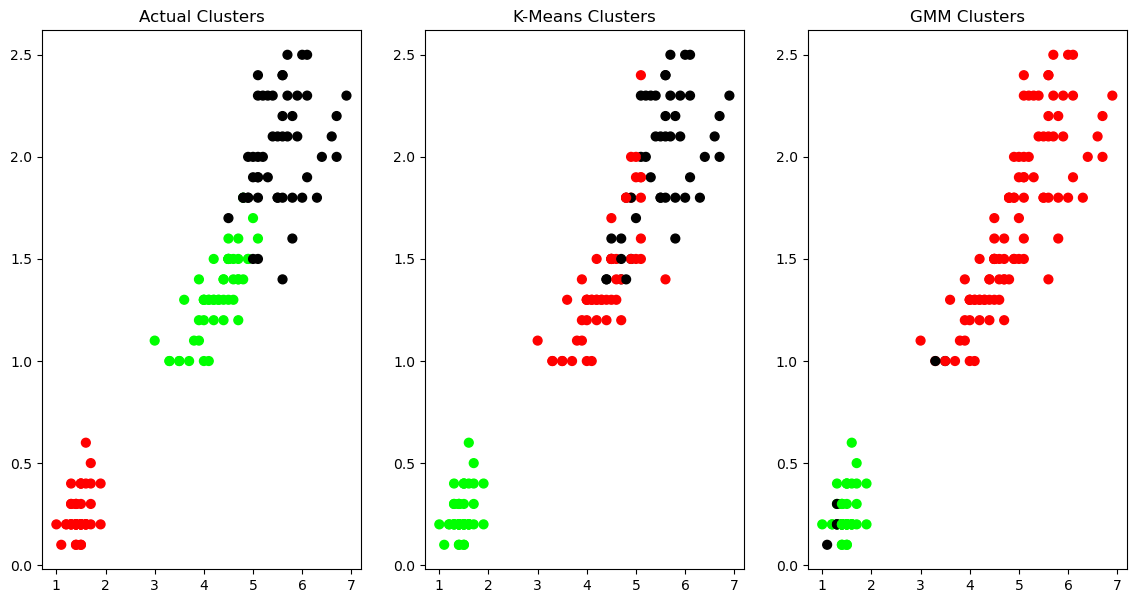

In [4]:
# 2b 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

iris = load_iris()
x = pd.DataFrame(iris.data, columns=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'])
y = iris.target

# Standardize the data
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
xs = pd.DataFrame(x_scaled, columns=x.columns)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(xs)
kmeans_labels = kmeans.labels_

# Gaussian Mixture Model (EM algorithm)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(xs)
gmm_labels = gmm.predict(xs)

# Evaluate accuracies
accuracy_kmeans = accuracy_score(y, kmeans_labels)
accuracy_gmm = accuracy_score(y, gmm_labels)
print("Accuracy of K-Means:", accuracy_kmeans)
print("Accuracy of EM (GMM):", accuracy_gmm)

# Plotting
colormap = np.array(['red', 'lime', 'black'])
plt.figure(figsize=(14, 7))

# Plot actual clusters
plt.subplot(1, 3, 1)
plt.scatter(x.Petal_length, x.Petal_width, c=colormap[y], s=40)
plt.title("Actual Clusters")

# Plot K-Means clusters
plt.subplot(1, 3, 2)
plt.scatter(x.Petal_length, x.Petal_width, c=colormap[kmeans_labels], s=40)
plt.title("K-Means Clusters")

# Plot GMM clusters
plt.subplot(1, 3, 3)
plt.scatter(x.Petal_length, x.Petal_width, c=colormap[gmm_labels], s=40)
plt.title("GMM Clusters")

plt.show()

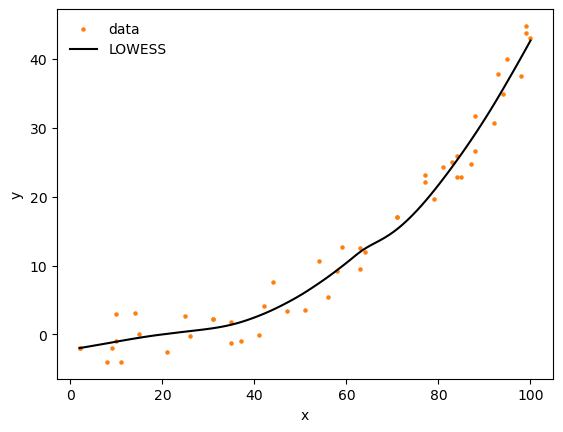

In [5]:
# 3a 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from moepy import lowess

data = pd.read_csv('curve.csv')
x_col = data.columns[0]
y_col = data.columns[1]
x = np.array(data[x_col])
y = np.array(data[y_col])

# Model fitting
lowess_model = lowess.Lowess()
lowess_model.fit(x, y)

# Model prediction
x_pred = np.linspace(min(x), max(x), 100)  # Adjust the range for x_pred accordingly
y_pred = lowess_model.predict(x_pred)

# Plotting
plt.scatter(x, y, label='data', color='C1', s=5, zorder=1)
plt.plot(x_pred, y_pred, '-', label='LOWESS', color='k', zorder=3)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(frameon=False)
plt.show()

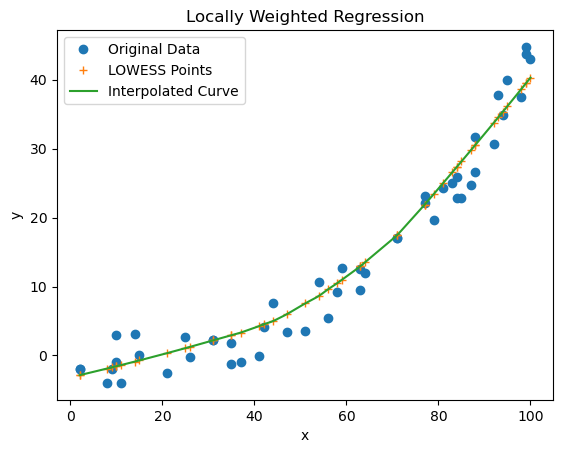

In [6]:
# 3b

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
import pandas as pd
import numpy as np

data = pd.read_csv("curve.csv")
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
#x=[i/5.0 for i in range(30)]
#y=[1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,13]

lowess = sm.nonparametric.lowess(y, x)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = np.linspace(min(x), max(x), 100)
ynew = f(xnew)

plt.plot(x, y, 'o', label='Original Data')
plt.plot(lowess_x, lowess_y, '+', label='LOWESS Points')
plt.plot(xnew, ynew, '-', label='Interpolated Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.show()

In [8]:
# 4a

import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100
print(X)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):
    return x * (1 - x)

epoch=5000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    n= 0
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

wout += hlayer_act.T.dot(d_output) *lr
wh += X.T.dot(d_hiddenlayer) *lr
n+=1
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.87117545]
 [0.86108862]
 [0.86648011]]


In [7]:
# 4b 

import numpy as np

# Data Preparation
X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)
y = np.array([[92], [86], [89]], dtype=float)

# Normalize data
X = X / np.amax(X, axis=0)
y = y / 100

# Neural Network Class
class NeuralNetwork:
    def __init__(self):
        # Parameters
        self.input_size = 2
        self.hidden_size = 3
        self.output_size = 1

        # Weights
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.random.randn(1, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.random.randn(1, self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.sigmoid(self.z2)
        return self.output

    def backward(self, X, y, o):
        # Backward propagate through the network
        self.error = y - o
        self.delta_output = self.error * self.sigmoid_derivative(o)
        self.error_hidden = self.delta_output.dot(self.W2.T)
        self.delta_hidden = self.error_hidden * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += self.a1.T.dot(self.delta_output)
        self.b2 += np.sum(self.delta_output, axis=0, keepdims=True)
        self.W1 += X.T.dot(self.delta_hidden)
        self.b1 += np.sum(self.delta_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs=5000, learning_rate=0.1):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Print the loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

# Instantiate and train the neural network
nn = NeuralNetwork()
nn.train(X, y)

# Test the trained network
print("\nPredicted Output:\n", nn.forward(X))

Epoch 0, Loss: 0.3227896322217911
Epoch 1000, Loss: 0.000485764269992099
Epoch 2000, Loss: 0.00035012423960999054
Epoch 3000, Loss: 0.00023947750702107214
Epoch 4000, Loss: 0.00014788418489028435

Predicted Output:
 [[0.90787912]
 [0.87017418]
 [0.88975459]]


In [9]:
# 5a

import random
import numpy as np

# initialize the population of bit vectors
def init_population(pop_size, genome_size): 
    return [random.choices(range(2), k=genome_size) for _ in range(pop_size)]

# an individual's fitness is the number of 1s
def fitness(individual):
    return sum(individual)

# tournament selection
def selection(population, fitnesses):
    tournament = random.sample(range(len(population)), k=3)
    tournament_fitnesses = [fitnesses[i] for i in tournament]
    winner_index = tournament[np.argmax(tournament_fitnesses)]
    return population[winner_index]

# single-point crossover
def crossover(parent1, parent2):
    xo_point = random.randint(1, len(parent1) - 1)
    return ([parent1[:xo_point] + parent2[xo_point:],
             parent2[:xo_point] + parent1[xo_point:]])

# bitwise mutation with probability 0.1
def mutation(individual):
    for i in range(len(individual)):
        if random.random() < 0.1:
            individual = individual[:i] + [1-individual[i]] + individual[i + 1:]
    return individual

pop_size, genome_size = 6, 5
population = init_population(pop_size, genome_size)  # generation 0

for gen in range(10):
    fitnesses = [fitness(individual) for individual in population]
    print('Generation ', gen, '\n', list(zip(population, fitnesses)))
    nextgen_population = []
    for i in range(int(pop_size / 2)):
        parent1 = selection(population, fitnesses)  # select first parent
        parent2 = selection(population, fitnesses)  # select second parent
        offspring1, offspring2 = crossover(parent1, parent2)  # perform crossover between both parents
        nextgen_population += [mutation(offspring1), mutation(offspring2)]  # mutate offspring
    population = nextgen_population

Generation  0 
 [([1, 0, 0, 1, 1], 3), ([1, 1, 1, 0, 0], 3), ([1, 1, 1, 0, 1], 4), ([0, 0, 0, 1, 1], 2), ([0, 1, 0, 1, 1], 3), ([0, 1, 1, 1, 0], 3)]
Generation  1 
 [([1, 1, 1, 0, 0], 3), ([0, 0, 1, 1, 1], 3), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4)]
Generation  2 
 [([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 0, 1, 0, 1], 3), ([1, 0, 1, 0, 1], 3), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4)]
Generation  3 
 [([1, 1, 1, 0, 1], 4), ([0, 1, 1, 1, 1], 4), ([1, 1, 0, 0, 1], 3), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4)]
Generation  4 
 [([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 0, 1, 0, 1], 3), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 1, 1], 5), ([0, 1, 1, 0, 1], 3)]
Generation  5 
 [([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 0], 3)]
Generation  6 
 [([1, 1, 1, 0, 1], 4), ([1, 1, 1, 1, 1], 5), ([1, 1, 1, 0, 1], 4), ([1, 1, 1, 0, 1], 4), (

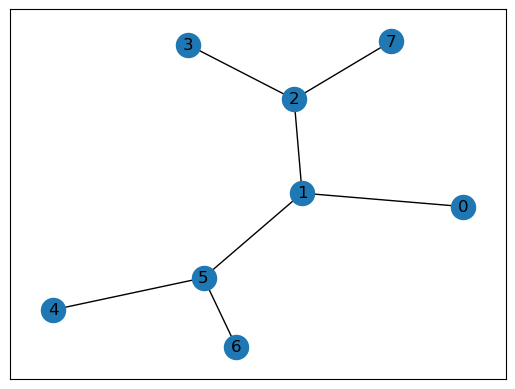

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 180.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 144.0
max_value 144.0
max_value 115.2
max_value 144.0
max_value 115.2
max_value 0.0
max_value 115.2
max_value 0.0
max_value 115.2
max_value 144.0
max_value 144.0
max_value 144.0
max_value 144.0
max_value 144.0
max_value 115.2
max_value 144.0
max_value 115.2
max_value 92.16000000000001
max_value 115.2
max_value 115.2
max_value 92.16000000000001
max_value 215.2
max_value 115.2
max_value 115.2
max_value 73.72800000000001
max_value 272.15999999999997
max_value 272.15999999999997
max_value 217.72799999999998
max_value 217.72799999999998
max_valu

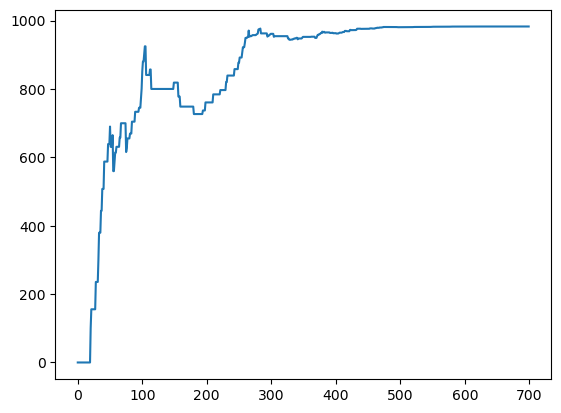

In [1]:
# 6a

import numpy as np
import pylab as plt
import networkx as nx

points_list = [(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7)]
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

R = np.matrix(np.ones(shape=(8,8))) # MATRIX_SIZE = 8
R *= -1

for point in points_list:
    if point[1] == goal:       # assign zeroes to paths and 100 to goal-reaching point
        R[point] = 100
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([8,8]))
gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row>=0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def update(current_state,action,gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action,max_index]
    
    Q[current_state,action] = R[current_state,action] + gamma * max_value
    print("max_value",Q[current_state,action])
    
    if(np.max(Q)>0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)

available_act = available_actions(initial_state)
action = sample_next_action(available_act)
update(initial_state,action,gamma)

# training 
scores = []
for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)  # print("Score:",str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# testing 
current_state = 0 
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,]== np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficent path:")
print(steps)
plt.plot(scores)
plt.show()

In [10]:
# 6b

import pandas as pd
import numpy as np
def get_possible_next_states(state, F, states_count):
    possible_next_states = []
    for i in range(states_count):
        if F[state, i] == 1: 
            possible_next_states.append(i)
    return possible_next_states

def get_random_next_state(state, F, states_count):
    possible_next_states = get_possible_next_states(state, F, states_count)
    next_state = possible_next_states[np.random.randint(0, len(possible_next_states))]
    return next_state

F = np.loadtxt("feasibility_matrix.csv", dtype="int", delimiter=',')
R = np.loadtxt("reward_matrix.csv", dtype="float", delimiter=',')

# Initializes quality matrix, denoted by Q, with all zeros
Q = np.zeros(shape=[15,15], dtype=np.float32)
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))

def train(F, R, Q, gamma, lr, goal_state, states_count, episodes):
    for i in range(0, episodes):
        current_state = np.random.randint(0, states_count)
        while(True):
            next_state = get_random_next_state(current_state, F, states_count)
            possible_next_next_states = get_possible_next_states(next_state, F, states_count)
            max_Q = -9999.99
            for j in range(len(possible_next_next_states)):
                next_next_state = possible_next_next_states[j]
                q = Q[next_state, next_next_state]
                if q > max_Q:
                    max_Q = q
            Q[current_state][next_state] = \
                ((1 - lr) * Q[current_state][next_state]) + (lr * (R[current_state][next_state] 
                                                                   + (gamma * max_Q)))
            current_state = next_state
            if current_state == goal_state:
                break
                
# Sets hyperparameters
gamma = 0.5   # discount factor
lr = 0.5      # learning_rate
goal_state = 14
states_count = 15
episodes = 1000
np.random.seed(42)

train(F, R, Q, gamma, lr, goal_state, states_count, episodes)

# Prints Q matrix generated out of training
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))

def print_shortest_path(start_state, goal_state, Q):
    current_state = start_state
    print(str(current_state) + "->", end="")
    while current_state != goal_state:
        next_state = np.argmax(Q[current_state])
        print(str(next_state) + "->", end="")
        current_state = next_state
    print("Goal Reached.\n")
    
# Performs few tests for agent to get the shortest path
start_state = 8
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 13
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 6
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 1
print("Best path to reach goal from state {0} to goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.62,0.00,2.50,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
5,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.16,0.00,0.00
8,0.00,0.00,0.00,1.25,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00


Best path to reach goal from state 8 to goal state 14
8->3->4->9->14->Goal Reached.

Best path to reach goal from state 13 to goal state 14
13->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 6 to goal state 14
6->5->10->11->12->7->8->3->4->9->14->Goal Reached.

Best path to reach goal from state 1 to goal state 14
1->0->5->10->11->12->7->8->3->4->9->14->Goal Reached.



In [11]:
# 6c

import pandas as pd
import numpy as np

def get_possible_next_states(state, F, states_count):
    possible_next_states = []
    for i in range(states_count):
        if F[state, i] == 1: 
            possible_next_states.append(i)
    
    return possible_next_states

def get_random_next_state(state, F, states_count):
    possible_next_states = get_possible_next_states(state, F, states_count)
    next_state = possible_next_states[np.random.randint(0, len(possible_next_states))]
    
    return next_state

def has_converged(Q, threshold=1e-6):
    return np.max(np.abs(Q - np.roll(Q, 1))) < threshold

def train(F, R, Q, gamma, lr, goal_state, states_count, episodes):
    for i in range(episodes):
        # Selects a random start state
        current_state = np.random.randint(0, states_count)

        # Continues until goal state is reached
        while True:
            # Exploration-Exploitation strategy
            epsilon = 0.1
            if np.random.rand() < epsilon:
                # Exploration: Choose a random next state
                next_state = get_random_next_state(current_state, F, states_count)
            else:
                # Exploitation: Choose the next state with the highest Q-value
                next_state = np.argmax(Q[current_state])

            # Gets all possible states from that next state
            possible_next_next_states = get_possible_next_states(next_state, F, states_count)

            # Compares the Q value between two possible next states
            max_Q = -9999.99
            for j in range(len(possible_next_next_states)):
                next_next_state = possible_next_next_states[j]
                q = Q[next_state, next_next_state]
                if q > max_Q:
                    max_Q = q
            
            # Updates the Q value using the Bellman equation
            Q[current_state][next_state] = \
                ((1 - lr) * Q[current_state][next_state]) + (lr * (R[current_state][next_state] + (gamma * max_Q)))

            # Changes state by considering the next state as the current state
            # Training continues until the goal state is reached
            current_state = next_state
            
            if current_state == goal_state:
                break

        # Convergence check
        if has_converged(Q):
            print(f"Converged after {i} episodes.")
            break

# Load matrices from files
F = np.loadtxt("feasibility_matrix.csv", dtype="int", delimiter=',')
R = np.loadtxt("reward_matrix.csv", dtype="float", delimiter=',')

# Initialize Q-matrix with small random values
Q = np.random.rand(15, 15)

# Display initial Q matrix
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))

# Set hyperparameters
gamma = 0.5        # discount factor
lr = 0.5           # learning_rate
goal_state = 14
states_count = 15
episodes = 1000

np.random.seed(42)

# Start training
train(F, R, Q, gamma, lr, goal_state, states_count, episodes)

# Display final Q matrix
display(pd.DataFrame(Q, dtype=float).style.format(precision=2))

# Function to print the shortest path
def print_shortest_path(start_state, goal_state, Q):
    current_state = start_state
    print(str(current_state) + "->", end="")
    
    # Loops until the goal is reached and keeps on tracing the path
    while current_state != goal_state:
        # Chooses the best state from possible states and keeps on printing
        next_state = np.argmax(Q[current_state])
        print(str(next_state) + "->", end="")
        
        # Considers the next state as the current state and continues until the goal is reached
        current_state = next_state
    
    print("Goal Reached.\n")

# Perform tests for the agent to find the shortest path
start_state = 8
print("Best path to reach the goal from state {0} to the goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 13
print("Best path to reach the goal from state {0} to the goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 6
print("Best path to reach the goal from state {0} to the goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

start_state = 1
print("Best path to reach the goal from state {0} to the goal state {1}".format(start_state, goal_state))
print_shortest_path(start_state, goal_state, Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.43,0.56,0.93,0.26,0.76,0.47,0.21,0.85,0.68,0.09,0.54,0.85,0.07,0.42,0.81
1,0.86,0.78,0.31,0.51,0.74,0.15,0.59,0.72,0.85,0.11,0.33,0.54,0.70,0.73,0.25
2,0.01,0.69,0.91,0.80,0.62,0.98,0.43,0.53,0.01,0.95,0.58,0.39,0.04,0.36,0.00
3,0.32,0.95,0.15,0.55,0.19,0.78,0.56,0.20,0.87,0.78,0.95,0.00,0.46,1.00,0.81
4,0.83,0.62,0.71,0.81,0.09,0.69,0.82,0.04,0.30,0.32,0.85,0.78,0.66,0.80,0.45
5,0.87,0.23,0.70,0.24,0.04,0.28,0.49,0.84,0.51,0.18,0.99,0.27,0.99,0.94,0.54
6,0.09,0.70,0.85,0.45,0.24,0.80,0.55,0.20,0.95,0.95,0.37,0.06,0.63,0.32,0.07
7,0.89,1.00,0.35,0.74,0.07,0.37,0.11,0.06,0.59,0.80,0.45,0.52,0.27,0.74,0.36
8,0.07,0.17,0.13,0.44,0.07,0.81,0.91,0.25,0.49,0.52,0.99,0.07,0.67,0.35,0.50
9,0.22,0.16,0.24,0.07,0.28,0.69,0.65,0.55,0.00,0.13,0.84,0.27,0.91,0.87,0.15


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.16,0.06,0.12,1.26,0.14,0.05,0.13,0.12,0.13,0.09,0.17,0.14,0.07,0.17,0.17
1,0.05,0.11,0.63,0.16,0.14,0.15,0.15,0.11,0.16,0.11,0.14,0.12,0.15,0.12,0.16
2,0.01,0.12,0.11,1.26,0.11,0.12,0.08,0.11,0.01,5.03,0.11,0.11,0.04,0.10,0.00
3,0.17,0.15,0.60,0.14,2.52,0.18,0.16,0.15,0.63,0.15,0.14,0.00,0.15,0.14,0.17
4,0.20,0.18,0.15,1.26,0.09,0.15,0.14,0.04,0.20,5.03,0.17,0.15,0.18,0.13,0.20
5,0.07,0.18,0.16,1.26,0.04,0.14,0.07,0.16,0.17,0.18,0.09,0.14,0.16,0.15,0.17
6,0.09,0.11,0.10,0.12,0.13,0.06,0.11,0.12,0.12,5.03,0.10,0.06,0.12,0.10,0.07
7,0.14,0.15,0.11,0.15,0.07,0.14,0.11,0.06,0.61,5.03,0.14,0.13,0.11,0.15,0.15
8,0.07,0.17,0.13,1.26,0.07,0.17,0.16,0.24,0.16,5.03,0.15,0.07,0.14,0.12,0.17
9,0.13,0.12,0.11,0.07,2.52,0.13,0.13,0.12,0.00,0.13,0.14,0.14,0.15,0.13,10.06


Best path to reach the goal from state 8 to the goal state 14
8->9->14->Goal Reached.

Best path to reach the goal from state 13 to the goal state 14
13->3->4->9->14->Goal Reached.

Best path to reach the goal from state 6 to the goal state 14
6->9->14->Goal Reached.

Best path to reach the goal from state 1 to the goal state 14
1->2->9->14->Goal Reached.

